# Capstone Project - The Battle of Neighborhoods
# Italian Restaurant in Toronto

## Introduction: Business Problem

Toronto is the most populous city in Canada, with a population of 2,731,571 in 2016. [1] Toronto is ethnically diverse and multicultural. Lots of immigrants with different backgrounds live in Toronto, and they bring their ethnic cuisine to this city such as Italian, Asian, Greek and etc. [2]
 
In this project, we explore the best locations for Italian restaurants in Toronto. Italian food is one of the most popular cuisine in the world. Just the North America pasta market reached a volume of nearly 3 Million Tons in 2018.[3] 

This report investigates which neighborhoods and boroughs of Toronto have the best and also highest number of Italian restaurants. Furthermore, this report will answer the questions *“Which Neighborhood have potential Italian restaurant Market?”,  “Where would I go in Toronto to have the best Italian food?”, and "Which areas dose not have any Italian restaurants"*


## Data

Following data sources will be needed to extract/generate the required information:


* Toronto data contains list of Boroughs, Neighborhoods and postcodes. We will use this data set to explore various neighborhoods of Toronto. Obtained from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M


* Additional data including longitude and latitude for each postcode will be obtained from http://cocl.us/Geospatial_data 
  

* All data related to locations and quality of Italian restaurants in Toronto will be obtained via the **Foursquare API** 


# Methodology

The first step is to get required data about Toronto, which is available on Wikipedia. By using BeautifulSoup, the data  will be extracted from wikipedia and then transfered to dataframe. Next, additional data including post Code, longitude and latitude will be obtained from http://cocl.us/Geospatial_data and transfered to another dataframe. Eventually two dataframes will be attached at the mutual column.

By using FourSquare API, all venues for each neighborhood can be transfered to dataframe. By filtering these data, Italian restaurants will be listed. In addition, the count of tips and likes, and rating is obtained by FourSquare API and transfered to dataframe. We will have the average rating for each neighnourhood and borough, and visualize the ranking of neighborhoods using folium library.

In [118]:
# import required Libraries
import pandas as pd
!pip install BeautifulSoup4
from bs4 import BeautifulSoup
import requests
import numpy as np 


!pip install geopy 
!pip install geocoder

from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import geocoder

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # plotting library


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline


print('Libraries imported.')

Libraries imported.


In [145]:
page = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(page.content, 'html.parser')

In [146]:
table = soup.find('tbody')
rows = table.select('tr')
row = [r.get_text() for r in rows]

In [147]:
df = pd.DataFrame(row)
df = df[0].str.split('\n', expand=True)
df = df.rename(columns=df.iloc[0])
df = df.drop(df.index[0])
df.head()

,,Postal Code,,Borough,,Neighborhood,
1,,M1A,,Not assigned,,,
2,,M2A,,Not assigned,,,
3,,M3A,,North York,,Parkwoods,
4,,M4A,,North York,,Victoria Village,
5,,M5A,,Downtown Toronto,,"Regent Park, Harbourfront",


In [148]:
df= df[df.Borough != 'Not assigned']
df.head()

,,Postal Code,,Borough,,Neighborhood,
3,,M3A,,North York,,Parkwoods,
4,,M4A,,North York,,Victoria Village,
5,,M5A,,Downtown Toronto,,"Regent Park, Harbourfront",
6,,M6A,,North York,,"Lawrence Manor, Lawrence Heights",
7,,M7A,,Downtown Toronto,,"Queen's Park, Ontario Provincial Government",


In [149]:
df = df.groupby(['Postal Code', 'Borough'], sort = False).agg(','.join)
df.reset_index(inplace = True)
df.head()

,Postal Code,Borough,,,,Neighborhood,
0,M3A,North York,,,,Parkwoods,
1,M4A,North York,,,,Victoria Village,
2,M5A,Downtown Toronto,,,,"Regent Park, Harbourfront",
3,M6A,North York,,,,"Lawrence Manor, Lawrence Heights",
4,M7A,Downtown Toronto,,,,"Queen's Park, Ontario Provincial Government",


In [150]:
df = df.replace("Not assigned", "Queen's Park")
df.head()

,Postal Code,Borough,,,,Neighborhood,
0,M3A,North York,,,,Parkwoods,
1,M4A,North York,,,,Victoria Village,
2,M5A,Downtown Toronto,,,,"Regent Park, Harbourfront",
3,M6A,North York,,,,"Lawrence Manor, Lawrence Heights",
4,M7A,Downtown Toronto,,,,"Queen's Park, Ontario Provincial Government",


In [151]:
df.shape

(103, 7)

In [152]:
url= url = "http://cocl.us/Geospatial_data"
df_Toronto = pd.read_csv(url)
df_Toronto.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [157]:
#df_Toronto.rename(columns={'Postal Code': 'Postal code'}, inplace=True)
toronto_data1= pd.merge(df[['Postal Code','Borough', 'Neighborhood']], df_Toronto [['Postal Code','Latitude', 'Longitude']], on='Postal Code')
toronto_data=toronto_data1 [['Borough', 'Neighborhood','Latitude', 'Longitude']]
toronto_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [156]:
#save the new_york_data into csv file.
toronto_data.to_csv('toronto_data_csv.csv', index=False)

In [7]:
toronto_data_csv=pd.read_csv('toronto_data_csv.csv')
toronto_data_csv.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,Regent Park / Harbourfront,43.654260,-79.360636
3,North York,Lawrence Manor / Lawrence Heights,43.718518,-79.464763
4,Downtown Toronto,Queen's Park / Ontario Provincial Government,43.662301,-79.389494


In [8]:
toronto_data_csv.shape

(103, 4)

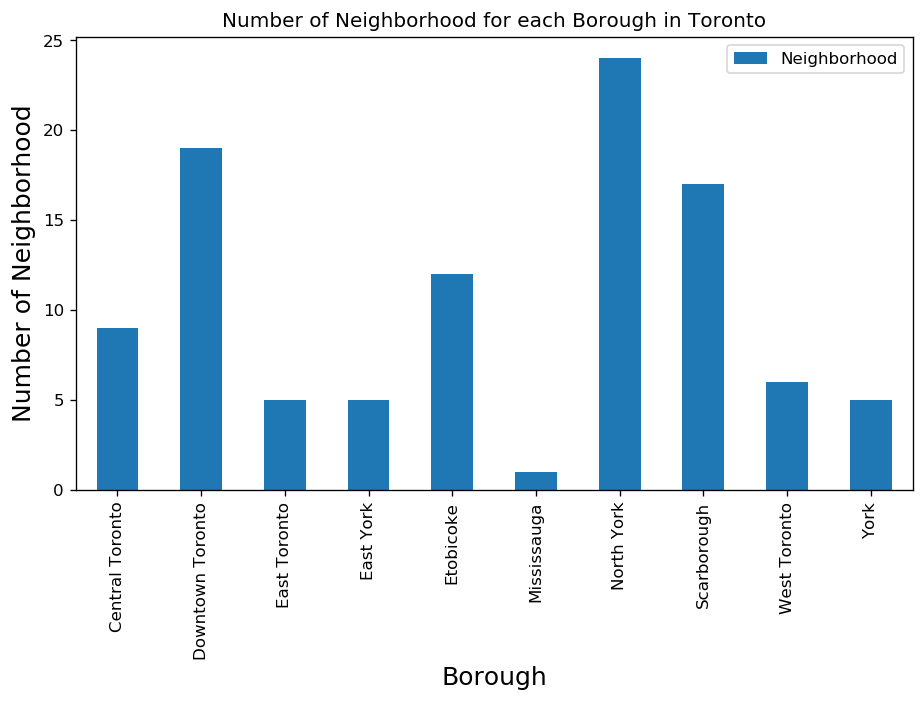

In [9]:
plt.figure(figsize=(9,5), dpi = 120)
toronto_data_csv.groupby('Borough')['Neighborhood'].count().plot(kind='bar')

plt.title('Number of Neighborhood for each Borough in Toronto')
plt.xlabel('Borough', fontsize = 15)
plt.ylabel('Number of Neighborhood', fontsize=15)
plt.legend()
plt.savefig('NB.png', bbox_inches='tight')
plt.show()

In [10]:
def get_categories(lat,lng):
    
    radius=1000 # within 1 km radius
    LIMIT=100 
    CLIENT_ID = 'KICB3D4YXXF2NJSBZU1T11DSJ2YH3IQE1LJUIQMFYLB4M0WX' # your Foursquare ID
    CLIENT_SECRET = 'GV5MDGVUMCGPE3KIODSEYWRB3KSROHV21NTP01ROACW3TZEN' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to call from foursquare api
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    
    # get data from API call
    results = requests.get(url).json()
    venue_data=results["response"]['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
        
    column_names=['ID','Name','Category']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [11]:
def get_categories_details(venue_id):
        
    CLIENT_ID = 'KICB3D4YXXF2NJSBZU1T11DSJ2YH3IQE1LJUIQMFYLB4M0WX' # your Foursquare ID
    CLIENT_SECRET = 'GV5MDGVUMCGPE3KIODSEYWRB3KSROHV21NTP01ROACW3TZEN' # your Foursquare Secret
    VERSION = '20180605' # Foursquare API version
    
    #url to call from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results["response"]['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [13]:
# neighborhood and borough having Italian resturants
column_names=['Borough', 'Neighborhood', 'ID','Name']
italian_rest_t=pd.DataFrame(columns=column_names)
count=1
for row in toronto_data_csv.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
    venues = get_categories(Latitude,Longitude)
    italian_resturants=venues[venues['Category']=='Italian Restaurant']   
    print('(',count,'/',len(toronto_data_csv),')','Italian Resturants in '+Neighborhood+', '+Borough+':'+str(len(italian_resturants)))
    for resturant_detail in italian_resturants.values.tolist():
        id, name , category=resturant_detail
        italian_rest_t = italian_rest_t.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 103 ) Italian Resturants in Parkwoods, North York:0
( 2 / 103 ) Italian Resturants in Victoria Village, North York:0
( 3 / 103 ) Italian Resturants in Regent Park / Harbourfront, Downtown Toronto:3
( 4 / 103 ) Italian Resturants in Lawrence Manor / Lawrence Heights, North York:0
( 5 / 103 ) Italian Resturants in Queen's Park / Ontario Provincial Government, Downtown Toronto:3
( 6 / 103 ) Italian Resturants in Islington Avenue, Etobicoke:0
( 7 / 103 ) Italian Resturants in Malvern / Rouge, Scarborough:0
( 8 / 103 ) Italian Resturants in Don Mills, North York:0
( 9 / 103 ) Italian Resturants in Parkview Hill / Woodbine Gardens, East York:0
( 10 / 103 ) Italian Resturants in Garden District / Ryerson, Downtown Toronto:3
( 11 / 103 ) Italian Resturants in Glencairn, North York:0
( 12 / 103 ) Italian Resturants in West Deane Park / Princess Gardens / Martin Grove / Islington / Cloverdale, Etobicoke:0
( 13 / 103 ) Italian Resturants in Rouge Hill / Port Union / Highland Creek, Scarboro

In [100]:
italian_rest_t.head(10)

,Borough,Neighborhood,ID,Name
0,Downtown Toronto,Regent Park / Harbourfront,4ad776eef964a520e20a21e3,Mangia and Bevi Resto-Bar
1,Downtown Toronto,Regent Park / Harbourfront,4cbdc6784495721ea262617a,Fusaro's
2,Downtown Toronto,Regent Park / Harbourfront,56d8dff7498eb4e5e661e78d,Ardo
3,Downtown Toronto,Queen's Park / Ontario Provincial Government,4a8355bff964a520d3fa1fe3,Mercatto
4,Downtown Toronto,Queen's Park / Ontario Provincial Government,5a69ba9112138476a91996f8,Dal Moro's Fresh Pasta To Go
5,Downtown Toronto,Garden District / Ryerson,4b49183ff964a520a46526e3,Terroni
6,Downtown Toronto,Garden District / Ryerson,4cbdc6784495721ea262617a,Fusaro's
7,North York,Glencairn,4f9341a7e4b059d7da01e984,Ristorante Boccaccio
8,Scarborough,Rouge Hill / Port Union / Highland Creek,4bccf9bf511f9521ce0eb4c7,Fratelli Village Pizzeria
9,North York,Don Mills,4bdaff7463c5c9b67bcb2568,Sorento Restaurant


In [101]:
italian_rest_t.shape

(105, 4)

In [103]:
italian_rest_t.to_csv('italian_rest_t_csv.csv', index=False)

In [158]:
italian_rest_t_csv=pd.read_csv('italian_rest_t_csv.csv')

In [13]:
italian_rest_t_csv.shape

(105, 4)

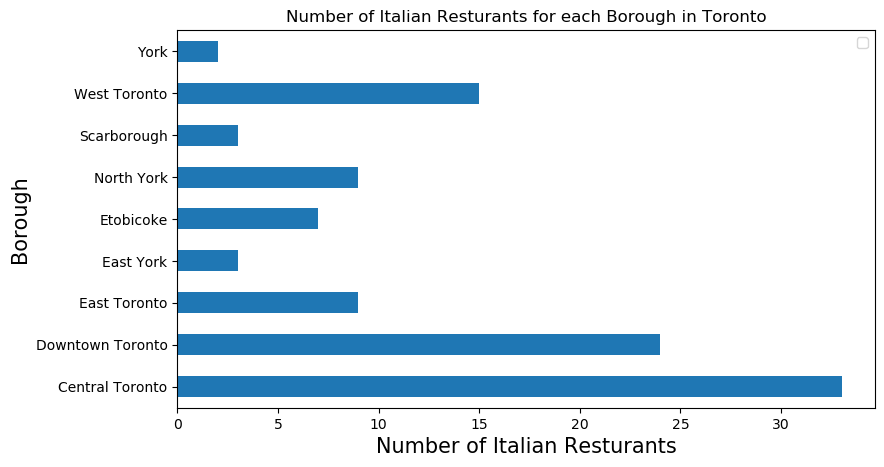

In [12]:
plt.figure(figsize=(9,5), dpi = 100)
italian_rest_t_csv.groupby('Borough')['ID'].count().plot(kind='barh')

plt.title('Number of Italian Resturants for each Borough in Toronto')
plt.xlabel('Number of Italian Resturants', fontsize = 15)
plt.ylabel('Borough', fontsize=15)
plt.legend('')
plt.savefig('BR.png', bbox_inches='tight')
plt.show()

Following figure shows the number of Italian restaurants in each Neighborhood in Toronto. Davisville in Central Toronto has the largest number (eight) of Italian restaurants.

In [14]:
italian_rest_t_neigh=italian_rest_t_csv.groupby('Neighborhood')['ID']

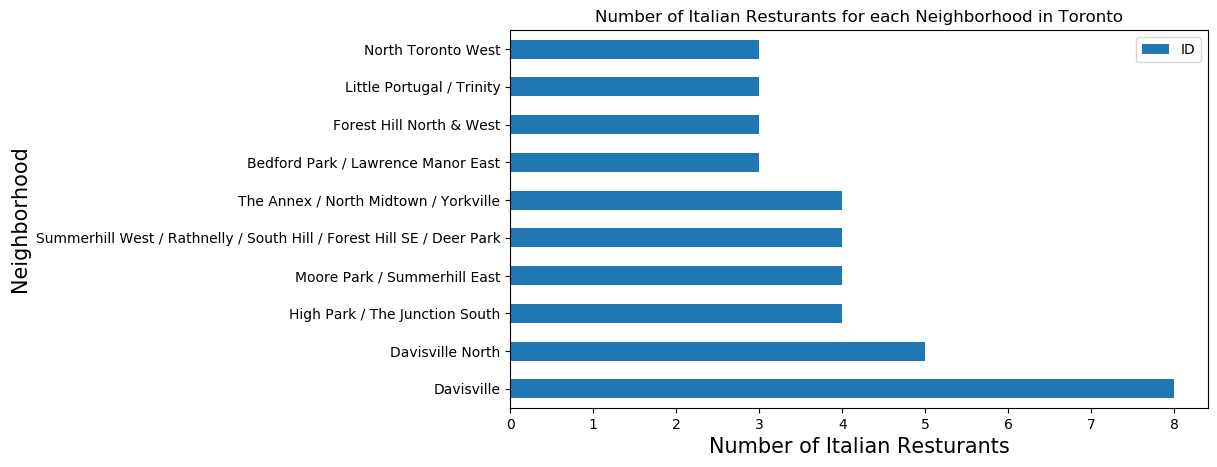

In [17]:
plt.figure(figsize=(9,5), dpi = 100)
italian_rest_t_neigh.count().nlargest(10).plot(kind='barh')
plt.title('Number of Italian Resturants for each Neighborhood in Toronto')
plt.xlabel('Number of Italian Resturants', fontsize = 15)
plt.ylabel('Neighborhood', fontsize=15)
plt.legend()
plt.savefig('NR.png', bbox_inches='tight')
plt.show()

In [15]:
italian_rest_t_csv[italian_rest_t_csv['Neighborhood']=='Davisville']

,Borough,Neighborhood,ID,Name
69,Central Toronto,Davisville,5bdcf092cb3fd2002c311f71,Bar Buca
70,Central Toronto,Davisville,4bd4b2546798ef3bb235628d,Florentia Ristorante
71,Central Toronto,Davisville,4ae86fb7f964a52053af21e3,Balsamico
72,Central Toronto,Davisville,4b71edddf964a520cb642de3,Positano
73,Central Toronto,Davisville,4b6b758ff964a520270a2ce3,Five Doors North
74,Central Toronto,Davisville,4ad4c061f964a520a2f720e3,Grazie Ristorante
75,Central Toronto,Davisville,4ad4c05cf964a52004f620e3,Grano
76,Central Toronto,Davisville,4bd229df046076b062667371,Il Sogno


Then we need further information such as likes, rating and tips for each restaurant for additional analysis. The data will be transfered into dataframe and saved as csv file.

In [159]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
italian_details=pd.DataFrame(columns=column_names)

count=1
for row in italian_rest_t_csv.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_categories_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(italian_rest_t_csv),')','processed')
    italian_details = italian_details.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                       Name  Likes  Rating  Tips
0  4ad776eef964a520e20a21e3  Mangia and Bevi Resto-Bar     77     8.4    40
( 1 / 105 ) processed
                         ID      Name  Likes  Rating  Tips
0  4cbdc6784495721ea262617a  Fusaro's     57     8.5    22
( 2 / 105 ) processed
                         ID  Name  Likes  Rating  Tips
0  56d8dff7498eb4e5e661e78d  Ardo     15     7.4     8
( 3 / 105 ) processed
                         ID      Name  Likes  Rating  Tips
0  4a8355bff964a520d3fa1fe3  Mercatto     56     7.8    26
( 4 / 105 ) processed
                         ID                          Name  Likes  Rating  Tips
0  5a69ba9112138476a91996f8  Dal Moro's Fresh Pasta To Go      9     8.2     6
( 5 / 105 ) processed
                         ID     Name  Likes  Rating  Tips
0  4b49183ff964a520a46526e3  Terroni    278     8.1    95
( 6 / 105 ) processed
                         ID      Name  Likes  Rating  Tips
0  4cbdc6784495721ea262617a  Fusaro's

In [ ]:
italian_details.to_csv('italian_details_csv.csv', index=False)

In [161]:
italian_details_csv=pd.read_csv('italian_details_csv.csv')

In [162]:
italian_details_csv.shape

(105, 7)

In [163]:
italian_details_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       105 non-null    object 
 1   Neighborhood  105 non-null    object 
 2   ID            105 non-null    object 
 3   Name          105 non-null    object 
 4   Likes         105 non-null    int64  
 5   Rating        105 non-null    float64
 6   Tips          105 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 5.9+ KB


In [160]:
italian_details_csv.head(10)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
0,Downtown Toronto,Regent Park / Harbourfront,4ad776eef964a520e20a21e3,Mangia and Bevi Resto-Bar,77,8.4,40
1,Downtown Toronto,Regent Park / Harbourfront,4cbdc6784495721ea262617a,Fusaro's,57,8.5,22
2,Downtown Toronto,Regent Park / Harbourfront,56d8dff7498eb4e5e661e78d,Ardo,15,7.4,8
3,Downtown Toronto,Queen's Park / Ontario Provincial Government,4a8355bff964a520d3fa1fe3,Mercatto,56,7.8,26
4,Downtown Toronto,Queen's Park / Ontario Provincial Government,5a69ba9112138476a91996f8,Dal Moro's Fresh Pasta To Go,9,8.2,6
5,Downtown Toronto,Garden District / Ryerson,4b49183ff964a520a46526e3,Terroni,278,8.1,95
6,Downtown Toronto,Garden District / Ryerson,4cbdc6784495721ea262617a,Fusaro's,57,8.5,22
7,North York,Glencairn,0,0,0,0.0,0
8,Scarborough,Rouge Hill / Port Union / Highland Creek,4bccf9bf511f9521ce0eb4c7,Fratelli Village Pizzeria,18,7.7,15
9,North York,Don Mills,4bdaff7463c5c9b67bcb2568,Sorento Restaurant,9,8.2,8


In [37]:
italian_details_csv.iloc[italian_details_csv['Likes'].idxmax()]


Borough                  Downtown Toronto
Neighborhood    Garden District / Ryerson
ID               4b49183ff964a520a46526e3
Name                              Terroni
Likes                                 278
Rating                                8.1
Tips                                   95
Name: 5, dtype: object

In [38]:
#print(' The highest amount of Likesmax(italian_details_csv['Likes'])

In [39]:
italian_details_csv.iloc[italian_details_csv['Rating'].idxmax()]

Borough                           West Toronto
Neighborhood    High Park / The Junction South
ID                    540f2951498e7516839a7126
Name                                      nodo
Likes                                       36
Rating                                       9
Tips                                        11
Name: 57, dtype: object

In [40]:
italian_details_csv.iloc[italian_details_csv['Tips'].idxmax()]

Borough                  Downtown Toronto
Neighborhood    Garden District / Ryerson
ID               4b49183ff964a520a46526e3
Name                              Terroni
Likes                                 278
Rating                                8.1
Tips                                   95
Name: 5, dtype: object

In [18]:
neighborhood_detail=italian_details_csv.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
neighborhood_detail.columns=['Neighborhood','Average Rating']

In [19]:
neighborhood_detail.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
31,New Toronto / Mimico South / Humber Bay Shores,8.700000
42,St. James Town / Cabbagetown,8.600000
28,Little Portugal / Trinity,8.433333
41,St. James Town,8.333333
5,Christie,8.300000
6,Church and Wellesley,8.300000
19,Garden District / Ryerson,8.300000
37,Richmond / Adelaide / King,8.200000
21,Harbourfront East / Union Station / Toronto Is...,8.200000
17,First Canadian Place / Underground city,8.200000


In [20]:
borough_detail=italian_details_csv.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
borough_detail.columns=['Borough','Average Rating']

In [21]:
borough_detail.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
1,Downtown Toronto,8.170833
7,West Toronto,8.080000
2,East Toronto,7.733333
6,Scarborough,7.600000
0,Central Toronto,7.484848


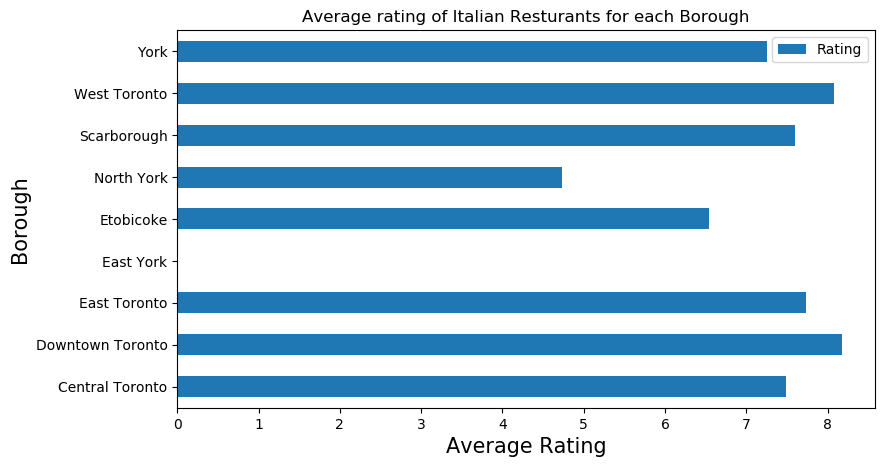

In [25]:
plt.figure(figsize=(9,5), dpi = 100)
italian_details_csv.groupby('Borough').mean()['Rating'].plot(kind='barh')

plt.title('Average rating of Italian Resturants for each Borough')
plt.xlabel('Average Rating', fontsize = 15)
plt.ylabel('Borough', fontsize=15)
plt.legend()
plt.savefig('BRA.png', bbox_inches='tight')
plt.show()

The Neighborhood with average rating of 8.5 or higher is filtered, and 2 dataframes are merged:

In [103]:
neighborhood_detail1=neighborhood_detail[neighborhood_detail['Average Rating']>=8.5]

In [104]:
neighborhood_detail1.sort_values(['Average Rating'],ascending=False).head()

,Neighborhood,Average Rating
31,New Toronto / Mimico South / Humber Bay Shores,8.7
42,St. James Town / Cabbagetown,8.6


In [105]:
neighborhood_detail1=pd.merge(neighborhood_detail1, toronto_data_csv, on='Neighborhood')

In [106]:
neighborhood_detail1=neighborhood_detail1[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]

In [164]:
neighborhood_detail1

,Borough,Neighborhood,Latitude,Longitude,Average Rating,Label
0,Etobicoke,New Toronto / Mimico South / Humber Bay Shores,43.605647,-79.501321,8.7,New Toronto / Mimico South / Humber Bay Shores...
1,Downtown Toronto,St. James Town / Cabbagetown,43.667967,-79.367675,8.6,"St. James Town / Cabbagetown, Downtown Toronto..."


In [88]:
address ='Toronto, ON' 
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print(latitude, longitude)

43.6534817 -79.3839347


In [113]:
mapt = folium.Map(location=[latitude, longitude], zoom_start=12)
incidents = folium.map.FeatureGroup()

for lat, lng, in neighborhood_detail1[['Latitude','Longitude']].values:
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=10, 
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [114]:
#neighborhood_detail1['Label']=neighborhood_detail1['Neighborhood']+', '+neighborhood_detail1['Borough']+'('+neighborhood_detail1['Average Rating'].map(str)+')'

In [115]:
#neighborhood_detail1['Label']

In [116]:
neighborhood_detail1['Label']=neighborhood_detail1['Neighborhood']+', '+neighborhood_detail1['Borough']+'('+neighborhood_detail1['Average Rating'].map(str)+')'
# add pop-up text to each marker on the map
for lat, lng, label in neighborhood_detail1[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(mapt)        
# add incidents to map
mapt.add_child(incidents)
mapt.save('map.html')
#mapt.save('FO.png')
mapt

# Conclusion

Davisville (Downtown Toronto) has the most number of italian restaurants in Toronto. New Toronto (Etobicoke), St. James Town(Downtown Toronto), Little Portugal (West Toronto) are some of the best neighborhoods for Italian cuisine in Toronto. Downtown Toronto have potential Italian Resturant Market, there are multiple neighborhoods in Downtown Toronto with average ratings exceeding 8.1. East Park ranks last in average rating (0 from 10) of Italian restaurants. It might be as a result of limitation of data providing only by Foursquare. In addition, I would go to Terroni in Downtown Toronto for the best Italian food based on 278 likes and Rating of 8.1. Downtown Toronto and West Toronto are the best place to stay if you prefer Italian Cuisine.

[1] https://en.wikipedia.org/wiki/Toronto   
[2] https://en.wikipedia.org/wiki/Cuisine_in_Toronto    
[3] https://www.imarcgroup.com/north-america-pasta-market    
